In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the data
print(x_train.shape, y_train.shape) # (50000, 32, 32, 3) (50000, 1)
print(x_test.shape, y_test.shape)   # (10000, 32, 32, 3) (10000, 1)
print(x_train[0])
print(y_train[0])

# Data preprocessing
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Model configuration
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Model compilation
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Model summary
model.summary()

# Model fitting
es = EarlyStopping(monitor='loss', patience=10, mode='auto')
modelpath = '../data/modelcheckpoint/k46_cifar10_{epoch:02d}-{val_loss:.4f}.hdf5'
cp = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True, mode='auto')
hist = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[es, cp])

# Model evaluation
loss = model.evaluate(x_test, y_test)
print('loss:', loss[0])
print('acc:', loss[1])


2024-02-29 16:54:33.718136: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 16:54:33.718388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 16:54:33.772591: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 16:54:33.929064: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-29 16:54:35.592714: W tensorflow/compiler/tf2

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


2024-02-29 16:54:42.933742: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-29 16:54:43.196549: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-29 16:54:43.196638: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-29 16:54:43.202248: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-29 16:54:43.202338: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

2024-02-29 16:54:48.457962: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2024-02-29 16:54:51.282053: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/10


2024-02-29 16:54:53.143651: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-02-29 16:54:53.375390: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-02-29 16:54:55.961178: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3e483461b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-29 16:54:55.961268: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-02-29 16:54:55.981226: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709205896.117388   12576 device_compiler.h:186] Compiled cluster using XL

313/313 [==============================] - ETA: 0s - loss: 1.6838 - acc: 0.3802

2024-02-29 16:55:45.825437: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2024-02-29 16:55:46.402463: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 56s 133ms/step - loss: 1.6838 - acc: 0.3802 - val_loss: 1.3776 - val_acc: 0.4941
Epoch 2/10
  3/313 [..............................] - ETA: 9s - loss: 1.4257 - acc: 0.4922

/home/fitzingout/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 27s 87ms/step - loss: 1.2195 - acc: 0.5610 - val_loss: 1.0387 - val_acc: 0.6306
Epoch 3/10
313/313 [==============================] - 37s 119ms/step - loss: 1.0005 - acc: 0.6428 - val_loss: 0.8801 - val_acc: 0.6885
Epoch 4/10
313/313 [==============================] - 37s 118ms/step - loss: 0.8827 - acc: 0.6852 - val_loss: 0.8194 - val_acc: 0.7098
Epoch 5/10
313/313 [==============================] - 17s 55ms/step - loss: 0.7845 - acc: 0.7232 - val_loss: 0.7338 - val_acc: 0.7424
Epoch 6/10
313/313 [==============================] - 18s 56ms/step - loss: 0.7094 - acc: 0.7490 - val_loss: 0.7235 - val_acc: 0.7470
Epoch 7/10
313/313 [==============================] - 37s 118ms/step - loss: 0.6502 - acc: 0.7703 - val_loss: 0.6955 - val_acc: 0.7566
Epoch 8/10
313/313 [==============================] - 37s 118ms/step - loss: 0.5951 - acc: 0.7882 - val_loss: 0.6517 - val_acc: 0.7726
Epoch 9/10
313/313 [==============================] - 37s 117ms/step 

2024-02-29 17:00:32.491920: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 4s 8ms/step - loss: 0.7092 - acc: 0.7631
loss: 0.7092453837394714
acc: 0.7631000280380249


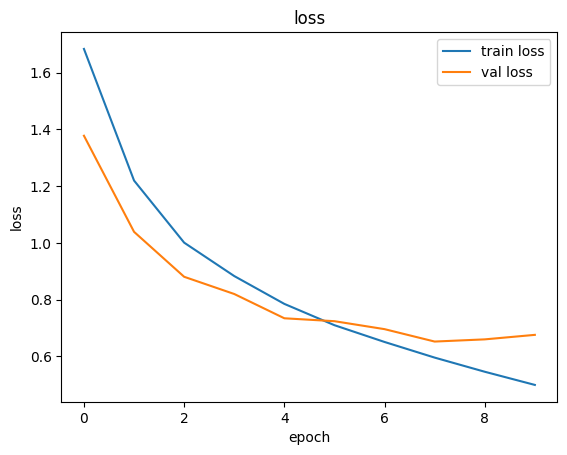

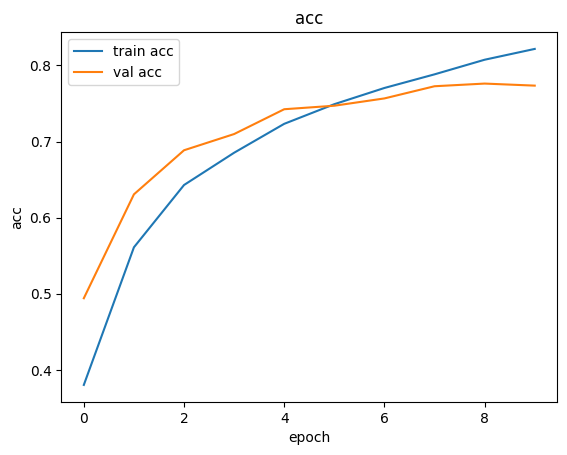

In [2]:
#plot loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

#plot acc
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train acc', 'val acc'])
plt.show()
